<a href="https://colab.research.google.com/github/huyunwei/robust/blob/main/robust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Robust Design
## Tolerance Analysis
### Monte Carlo Simulation   

Monte Carlo simulation is a useful method for performing tolerance stack-up analysis. This method relies on statistical sampling to obtain a numerical result.  

Here's a simple example of using Monte Carlo simulation to perform tolerance stack-up analysis. Suppose we have a system with three components, each with its own nominal dimension and tolerance.  

We'll create a Python script to perform 10,000 simulations and understand the distribution of the total stack-up.  

This script defines the nominal dimensions and tolerances of the components and then simulates the total stack-up using random numbers from a normal distribution with means equal to the nominal dimensions and standard deviations equal to the tolerances.

The resulting histogram shows the distribution of the total stack-up over the simulations, which helps in understanding the variability in the system due to the tolerances of the individual components.

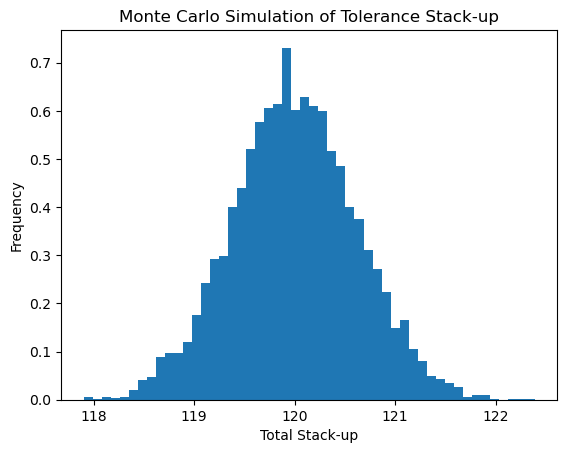

In [1]:
import random
import matplotlib.pyplot as plt

def monte_carlo_simulation(num_simulations):
    # Nominal dimensions and tolerances for three components
    nominal_dimensions = [50, 50, 20]
    tolerances = [0.5, 0.3, 0.2]

    # List to store the total stack-up for each simulation
    total_stack_ups = []

    # Perform simulations
    for _ in range(num_simulations):
        total_stack_up = 0
        for nominal, tolerance in zip(nominal_dimensions, tolerances):
            total_stack_up += random.gauss(nominal, tolerance)
        total_stack_ups.append(total_stack_up)

    return total_stack_ups

# Number of simulations
num_simulations = 10000

# Perform Monte Carlo simulation
total_stack_ups = monte_carlo_simulation(num_simulations)

# Plot histogram
plt.hist(total_stack_ups, bins=50, density=True)
plt.xlabel('Total Stack-up')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Tolerance Stack-up')
plt.show()


In [2]:
import numpy as np
import pandas as pd
from io import StringIO
df_csv = """X,mu,sigma
B1, 50, 0.5
B2, 20, 01
B3, 30, 0.2
E, 100.1, 0.3
"""
df_X = pd.read_csv(StringIO(df_csv))
df_X

,X,mu,sigma
0,B1,50.0,0.5
1,B2,20.0,1.0
2,B3,30.0,0.2
3,E,100.1,0.3


In [3]:
N_SIM = int(1e6)
df=pd.DataFrame()
for i in range(df_X.shape[0]):
  df[df_X['X'][i]] = np.random.normal(df_X.mu[i], df_X.sigma[i], N_SIM)

df

,B1,B2,B3,E
0,49.312402,18.929104,30.320255,100.149911
1,49.856808,21.831882,30.116341,99.896672
2,50.022394,21.580047,29.832018,100.372198
3,50.302925,22.398024,29.781475,99.860136
4,49.233422,21.770108,29.774889,99.792746
...,...,...,...,...
999995,49.993268,19.011131,30.087111,100.205316
999996,49.535533,18.867952,29.681307,100.428040
999997,50.005468,20.454877,29.977207,100.536334
999998,49.623418,22.260380,29.819370,100.345775


In [4]:
transf = 'Gap = E - B1 - B2 - B3'
df = df.eval(transf)



In [5]:
df.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]  )

,B1,B2,B3,E,Gap
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,50.000279,20.000548,29.999806,100.100527,0.099894
std,0.500857,1.000994,0.200020,0.300174,1.175972
min,47.556953,15.224471,29.013492,98.595485,-5.395071
1%,48.836509,17.677176,29.534957,99.401925,-2.635083
5%,49.176093,18.355465,29.670942,99.606784,-1.834988
25%,49.662926,19.324331,29.864785,99.897921,-0.693457
50%,50.000045,20.000277,29.999878,100.100864,0.100799
75%,50.337854,20.676584,30.134605,100.302818,0.892683
95%,50.823954,21.647816,30.329615,100.593765,2.034526


In [6]:
np.sqrt(np.sum(np.square(df_X.sigma)))

1.174734012447073

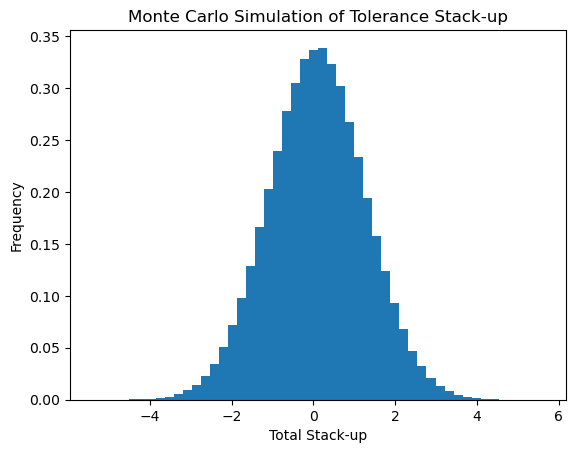

In [7]:
# Plot histogram
import matplotlib.pyplot as plt
plt.hist(df.Gap, bins=50, density=True)
plt.xlabel('Total Stack-up')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Tolerance Stack-up')
plt.show()

In [15]:
# import altair with an abbreviated alias
import altair as alt
alt.renderers.enable('mimetype')

# load a sample dataset as a pandas DataFrame
from vega_datasets import data
cars = data.cars()

# make the chart
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting
